In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the data
data = pd.read_csv('df_ca_new.csv')

C:\Users\Catarina Ferreira\AppData\Local\Temp\ipykernel_18908\614316429.py:7: DtypeWarning: Columns (15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('df_ca_new.csv')


In [2]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,...,store_sold_avg,cat_sold_avg,dept_sold_avg,cat_dept_sold_avg,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg
0,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,11101,...,1.374,1.374,1.374,1.374,0.7856,0.7856,0.7856,1.374,1.374,1.374
1,FOODS_1_002_CA_1_validation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29,11101,...,1.374,1.374,1.374,1.374,0.4778,0.4778,0.4778,1.374,1.374,1.374
2,FOODS_1_003_CA_1_validation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29,11101,...,1.374,1.374,1.374,1.374,0.8320,0.8320,0.8320,1.374,1.374,1.374
3,FOODS_1_004_CA_1_validation,FOODS_1_004,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29,11101,...,1.374,1.374,1.374,1.374,8.2600,8.2600,8.2600,1.374,1.374,1.374
4,FOODS_1_005_CA_1_validation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29,11101,...,1.374,1.374,1.374,1.374,1.1620,1.1620,1.1620,1.374,1.374,1.374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413203,FOODS_1_215_CA_1_validation,FOODS_1_215,FOODS_1,FOODS,CA_1,CA,d_1913,0,2016-04-24,11613,...,1.374,1.374,1.374,1.374,1.1010,1.1010,1.1010,1.374,1.374,1.374
413204,FOODS_1_216_CA_1_validation,FOODS_1_216,FOODS_1,FOODS,CA_1,CA,d_1913,1,2016-04-24,11613,...,1.374,1.374,1.374,1.374,0.7764,0.7764,0.7764,1.374,1.374,1.374
413205,FOODS_1_217_CA_1_validation,FOODS_1_217,FOODS_1,FOODS,CA_1,CA,d_1913,3,2016-04-24,11613,...,1.374,1.374,1.374,1.374,2.1040,2.1040,2.1040,1.374,1.374,1.374
413206,FOODS_1_218_CA_1_validation,FOODS_1_218,FOODS_1,FOODS,CA_1,CA,d_1913,6,2016-04-24,11613,...,1.374,1.374,1.374,1.374,11.7000,11.7000,11.7000,1.374,1.374,1.374


c:\Users\Catarina Ferreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Catarina Ferreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Best RMSE: 2.9241558844600006
Best Order (p, d, q): (1, 0, 0)
Best Seasonal Order (P, D, Q, s): (0, 0, 0, 7)


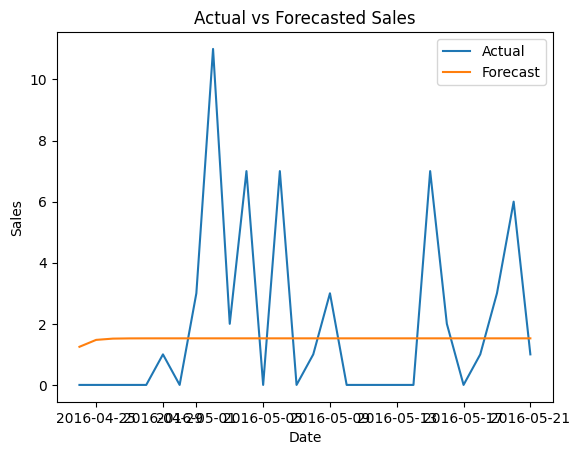

In [6]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Convert 'date' column to datetime if it's not already in datetime format
data['date'] = pd.to_datetime(data['date'])

# Set 'date' column as index
data.set_index('date', inplace=True)

# Determine the forecast horizon (28 days)
forecast_horizon = 28

# Train-test split
train = data.iloc[-100:-forecast_horizon]  # Historical data for training
test = data.iloc[-forecast_horizon:]   # Data for the 28-day forecast horizon

# Define seasonal periods to consider
seasonal_periods = [7]

# Perform SARIMA parameter selection with auto_arima
best_model = None
best_rmse = float('inf')

for s in seasonal_periods:
    # Fit SARIMA model using auto_arima
    model = auto_arima(train['sold'], seasonal=True, m=s, stepwise=True, trace=False)

    # Forecast
    forecast = model.predict(n_periods=len(test))

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test['sold'], forecast))

    # Update best model if RMSE is lower
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model

# Get the best SARIMA parameters
best_order = best_model.order
best_seasonal_order = best_model.seasonal_order

print("Best RMSE:", best_rmse)
print("Best Order (p, d, q):", best_order)
print("Best Seasonal Order (P, D, Q, s):", best_seasonal_order)

# Generate date range for forecast period
forecast_dates = pd.date_range(start=test.index[0], periods=len(test), freq='D')

# Slice actual sales data to match the length of the forecast
actual_sales = test['sold'].iloc[:len(forecast)]

# Visualize results
plt.plot(forecast_dates, actual_sales, label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Sales')
plt.legend()
plt.show()